## Ch. 7-1  ANN(인공신경망)  
패션 MNIST 활용해서 기초적인 신경망 구현하기


In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

e:\HongongML-DL_stduy\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


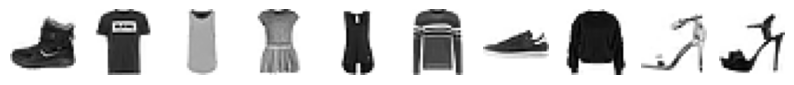

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
    
plt.show()

In [5]:
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


패션 MNIST에 포함된 10개 레이블의 의미는 다음과 같다.  
0 = 티셔츠  
1 = 바지  
2 = 스웨터  
3 = 드레스  
4 = 코트  
5 = 샌달  
6 = 셔츠  
7 = 스니커즈  
8 = 가방  
9 = 앵클 부츠


In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


이렇듯 훈련 샘플이 60000개나 되기에 전체 데이터를 한꺼번에 사용하여 모델 훈련하는 것 보다 샘플을 하나씩 꺼내서 모델을   
훈련하는 방법이 더 효윻적으로 보임ㅇㅇ 이런 상황에서 잘 맞는 방법이 바로 확률적 경사 하강법이다!  
이때 확률적 경사 하강법에서 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동한다. 이때 특성별로 값의 범위가 다르면  
올바르게 손실 함수의 경사를 내려 올 수 없겠지? 그래서 보통 픽셀값이 0~255 사이의 정수값을 가지므로 255로 나눠서 정규화  
를 진행한다. 표준화는 아니지만 양수 값으로 이뤄진 이미지를 전처리할 때 널리 사용하는 방법임

In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
print(train_scaled.shape)

(60000, 784)


그럼 먼저 ML에서 사용했던 SGDClassifier와 cross_validate 함수를 사용해서 이 데이터에서의 교차 검증으로 성능을 확인

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42) # 반복횟수 5회
scores = cross_validate(sc, train_scaled, train_target, n_jobs=4)
print(np.mean(scores['test_score']))

0.81945


In [10]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # 반복횟수 10회
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.83115


In [11]:
sc = SGDClassifier(loss='log_loss', max_iter=20, random_state=42) # 반복횟수 20회
scores = cross_validate(sc, train_scaled, train_target, n_jobs=4)
print(np.mean(scores['test_score']))

0.8440166666666666


가장 기본적인 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같다  
이 예제에서는 출력층의 클래스가 10개이고 입력층의 노드가 784개이다.  
McCulloch&Pitts Neuron이라고 한다.

그래서 경사하강법을 사용한 로지스틱 회귀 모델이 가장 간단한 인공 신경망이라면  
최신의 라이브러리 혹은 프레임워크에서는 SGDClassifier에는 없는 몇 가지 기능을 제공  
합니다, 이런 기능 덕택에 더 좋은 퍼포먼스를 낼 수 있다.
이때 텐서플로를 사용하는데 텐서플로 안에는 저수준 API와 고수준 API가 나눠져 있다.  
여기서 keras가 바로 고수준 API임. keras 라이브러리는 직접 GPU 연산을 수행하지 않음.  
대신 GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용한다. 예를 들어, 텐서플로가  
keras의 대표적인 백엔드 중 하나라고 할 수 있다. 이외에도 씨아노, CNTK 같은 여러 딥러닝  
라이브러리도 keras의 백엔드로 사용할 수 있음. 이런 keras를 Multi-backend keras라고 부름ㅇㅇ  
즉, keras API만 익히면 다양한 딥러닝 라이브러리를 입맛에 맞게 골라서 사용할 수 있다는 말.  
물론 한동안 Multi-backend keras의 지원이 중단됐지만 현재는 keras 3.0부터 다시 멀티-백엔드  
정책으로 바뀌었다. 이제 keras는 pytorch, jax, tensorflow를 백엔드로 사용함.  
현재 씨아노와 CNTK 얘네는 개발이 중지된 상태임  


In [12]:
import tensorflow as tf
import keras

keras.config.backend()

'tensorflow'

In [13]:
# keras의 백엔드 변경 시 환경 변수 KERAS_BACKEND
import os
os.environ["KERAS_BACKEND"] = "torch"

로지스틱 회귀에서는 교차 검증을 사용해 모델을 평가했지만, 인공 신경망에서는 교차검증을 잘 사용하지 않고  
검증 세트를 별도로 덜어내어 사용한다. 이렇게 하는 이유는  
1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적이고  
2. 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸리기 때문이다.  

어떤 딥러닝 모델은 훈련하는데 몇 시간, 심지어 며칠이 걸릴 수 도 있다!

In [14]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [15]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [16]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [17]:
inputs = keras.layers.Input(shape=(784,))

In [18]:
# 여기서는 FC layer를 만듦
dense = keras.layers.Dense(10, activation='softmax') # 첫 번째 매개변수로 뉴런 개수를 10개로 지정, 왜냐? 10개를 분류하니까! 그리고 확률값으로 변환하기 위해 softmax 사용
model = keras.Sequential([inputs, dense])
# keras 모델은 훈련하기 전에 설정 단계가 있다. 이런 설정을 model 객체의 compile() 메서드에서 수행함
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])


위 코드에서 먼저 loss가 binary_crossentropy면 이진 분류이고, categorical_crossentropy면 다중 분류이다.  
여기서 Sparse가 앞에 붙은 경우는 희소라는 뜻인데 정수로된 타깃값을 원-핫 인코딩하지 않고 그냥 사용하는 것이다!  
두 번째 metrics의 경우 keras는 모델이 훈련할때 기본으로 에포크마다 손실 값을 출력해 주는데 손실이 줄어드는 것을 보고  
훈련이 잘되었다는 것을 알 수 있지만 정확도를 함께 출력시 뒤 'accuracy'를 추가한다.

In [19]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7937 - loss: 0.6053
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8404 - loss: 0.4736
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8471 - loss: 0.4509
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8515 - loss: 0.4373
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8553 - loss: 0.4294


In [20]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8501 - loss: 0.4380


[0.43801820278167725, 0.8500833511352539]

## 심층 신경망(Deep Neural Network)  


In [21]:
import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [22]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [23]:
inputs = keras.layers.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

여기서 dense1 은닉층 뉴런의 개수를 정하는데는 특별한 기준이 없다. 그래서 몇 개의  
뉴런을 두어야 할지 판단하기 위해서 상당한 경험이 필요하다.  
여기에서 한 가지 제약 사항이 있다면 적어도 출력층의 뉴런보다는 많이 만들어야 함!!  
지금 신경망의 꼬라지 입력: 784 -> 은닉층: 100 -> 출력층: 10 


In [24]:
model = keras.Sequential([inputs, dense1, dense2]) # 층 넣을때는 리스트로 넣기!

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

위 코드의 출력에서 Output Shape가 (None, 100)인 이유는 샘플의 개수가 아직 정의되지 않았기 때문이다.  
나중에 fit() 메서드에서 훈련 데이터를 주입하면, 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어   
여러 번에 걸쳐 경사 하강법 단계를 수행한다. 바로 미니배치 GD를 사용하다는 뜻!  
케라스의 미니배치 크기는 32개이다. 이 값은 fit 메서드에서 batch_size 매개변수로 바꿀 수 있음!  
따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정이 된거임ㅇㅇ  
이렇게 신경망 층에 입력되거나 출력되는 배열의 첫 번재 차원을 batch 차원이라고 한다! 

1번째 층의 파라미터의 개수가 78500개인 이유는 당연히 784 X 100 = 78400이고 거기에 100개의 편향이 있으니까  
총 매개변수의 개수는 78500개이다! 그리고 2번째 층은 노드가 100개에서 10개로 가는거니까 1000+10=1010개가 있는거임ㅇㅇ  

In [26]:
# 층을 추가하는 다른 방법
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(100, activation='sigmoid', name='은닉층'),
    keras.layers.Dense(10, activation='softmax', name='출력층'),
], name='패션 MNIST 모델')

In [27]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 은닉층 (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 출력층 (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# 또는 이처럼 add() 메서드를 이용해서 Sequential 클래스에서 층을 추가할 수 있다!  
model = keras.Sequential()
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8052 - loss: 0.5663
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8517 - loss: 0.4117
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8638 - loss: 0.3766
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8718 - loss: 0.3538
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8790 - loss: 0.3366


#### ReLU 함수 (정류 함수)  
초창기에는 은닉층에서 많이 사용된 활성화 함수는 시그모이드 함수였다! 하지만 이 함수에는 단점이 있는데  
이 함수의 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지  
못한다! 특히 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 더 어렵게 만든다! 이를 개선하기 위해  
다른 종류의 활성화 함수가 제안이 됨ㅇㅇ 그것이 바로 ReLU라는 함수임!  
$max(0,x)$  
이게 수식이다! 고로 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고 음수일 경우 0으로 만든다!  

패션 MNIST 데이터는 28x28크기의 데이터이기에 ANN에 입력하기 위해 넘파이 배려의 reshape를 이용해서 1차원으로 펼쳤음.  
이렇게 직접 1차원으로 펼쳐도 좋지만 케라스에서는 이를 위한 Flatten 층을 제공한다. 사실 Flatten 층은 배치 차원을 제외하고  
나머지 입력 차원을 모두 일렬로 펼치는 역할만 함ㅇㅇ 입력에 곱해지는 가중치나 절편이 없다! 따라서 인공신경망의 성능을 위해  
기여하는 바는 없음! 하지만 입력층과 출력층 사이에 층처럼 추가해서 그냥 층이라 부르기도 함ㅇㅇ

In [31]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [34]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8101 - loss: 0.5373
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8585 - loss: 0.3938
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8696 - loss: 0.3559
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8791 - loss: 0.3324
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8863 - loss: 0.3143


In [35]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8760 - loss: 0.3651


[0.3651355803012848, 0.8759999871253967]

#### 옵티마이저  
신경망에는 하이퍼 파라미터. 즉, 초매개변수가 많다! 지금까지는 은닉층의 개수, 뉴런의 개수, 활성화 함수, 층의 종류,  
배치 사이즈, 에포크 매개변수 등이 있었음ㅇㅇ 케라스는 기본적으로 미니배치 경사하강법을 사용하며 미니배츼 개수는   
보통 32개이다! fit() 메서드의 batch_size 매개변수에서 미니배치의 수를 조정할 수 있다! 또한 fit() 메서드에서  
epochs= 매개변수도 하이퍼파라미터임ㅇㅇ 왜냐면 반복 횟수에 따라 다른 모델이 만들어지기 때문이다. 마지막으로   
앞에서 우리는 compile() 메서드에서 RMSprop을 사용함. 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공했음.  
이를 옵티마이저라고 부름. 처음부터 모델을 구성하고 각종 하이퍼파라미터의 최적값을 찾는 것은 어려운 작업이다!!  

In [36]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
# 위 코드는 이 코드와 동일한 뜻이다! 
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
# SGD 클래스의 기본 학습률은 0.01이다! 아래 처럼 learning_rate 매개변수에 지정해서 변경 가능함ㅇㅇ
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [39]:
# 기본 경사하강법 옵티마이저는 모두 SGD 클래스에서 제공한다! 이 코드처럼 SGD 클래스의 nesterov 매개변수를 기본값 False에서 True로 바꾸면 네스테로프 모멘텀 최적화를 사용함
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

대부분의 경우 nesterov 모멘텀 최적화가 기본 확률적 경사 하강법보다 더 나은 성능을 제공한다!  
모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있다! 이렇게 하면 안정적으로 최적점에 수렴할  
가능성이 높다! 이런 학습률을 적응적 학습률이라고 한다! 이런 방식들은 학습률 매개변수를 튜닝  
하는 수고를 덜 수 있다는 것이 장점이다!  

이런 적응적 학습률을 사용하는 대표적인 옵티마이저가 Adagrad와 RMSprop이다! 각각 compile() 메서드의  
optimizer 매개변수에 'adagrad'와 'rmsprop'으로 지정할 수 있다! optimizer 매개변수와 기본값이 바로   
'rmsprop'이다! 이 두 옵티마이저의 매개변수를 바꾸고 싶다면 SGD와 같이 Adagrad와 RMSprop 클래스 객체를  
만들어 사용하면 된다!

In [40]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

위의 모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam이다! Adam은 RMSprop과 함께 맨처음 시도해 볼 수 있는 좋은 알고리즘임  
Adam 클래스도 keras.optimizers 패키지 아래에 있다. 적응적 학습률을 사용하는 이 3개의 클래스는 learning_rate 매개변수의 기본값으로  
모두 0.001을 사용함 

In [42]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8171 - loss: 0.5222
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8572 - loss: 0.3964
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8719 - loss: 0.3527
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8798 - loss: 0.3289
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8855 - loss: 0.3107


In [44]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8755 - loss: 0.3429


[0.34294652938842773, 0.8755000233650208]

In [45]:
from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root='.', train=True, download=True)
fm_test = FashionMNIST(root='.', train=False, download=True)

In [46]:
print(type(fm_train.data))

<class 'torch.Tensor'>


In [47]:
print(fm_train.data.shape, fm_test.data.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [48]:
print(fm_train.targets.shape, fm_test.targets.shape)

torch.Size([60000]) torch.Size([10000])


In [49]:
train_input = fm_train.data
train_target = fm_train.targets

In [50]:
train_scaled = train_input / 255.0

In [51]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, val_scaled.shape)

torch.Size([48000, 28, 28]) torch.Size([12000, 28, 28])


In [52]:
import torch.nn as nn

model = nn.Sequential(
    nn.Flatten(), # 파이토치에선 케라스와 달리 입력의 크기를 사전에 정의할 필요가 없다!!
    nn.Linear(784,100), # 케라스의 Dense와 동일한 역할을 하는게 Linear 층이다!
    nn.ReLU(), # 파이토치에서는 활성화 함수를 별도의 층으로 추가해야함 
    nn.Linear(100,10) # 케라스와 달리 마지막 층의 활성화 함수를 생략
)

In [53]:
from torchinfo import summary

summary(model, input_size=(32, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 10]                  --
├─Flatten: 1-1                           [32, 784]                 --
├─Linear: 1-2                            [32, 100]                 78,500
├─ReLU: 1-3                              [32, 100]                 --
├─Linear: 1-4                            [32, 10]                  1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 2.54
Input size (MB): 0.10
Forward/backward pass size (MB): 0.03
Params size (MB): 0.32
Estimated Total Size (MB): 0.45

In [56]:
# 케라스의 경우에는 GPU가 감지되면 자동으로 모델을 GPU에서 훈련하지만, 파이토치는 명시적으로 GPU로 모델을 이동해야 한다! 그렇지 않으면 CPU 사용하게 됨
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=10, bias=True)
)

In [58]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

앞선 모델의 마지막 층 다음에 softmax activation function을 추가하지 않은 이유는 CroosEntropyLoss클래스에 소프트맥스 함수가 이미 포함되어 있기 때문이다!!  
파이토치의 CrossEntropyLoss 클래스는 softmax와 crossentropy 계산을 하나의 연산으로 합쳐 효율적으로 계산할 수 있도록 설계되어 있다. 따라서 다중 분류 문제를  
다룰 때, 파이토치 모델의 마지막에 소프트맥스를 절대 추가하면 안됨ㅇㅇ 해보면 알겠지만 결과가 오히려 나빠짐 이미 softmax처리된걸 다시 처리하면 당연히 안 좋음

pytorch에는 keras와 달리 fit함수가 따로 없어서 에포크와 경사하강법을 위한 for문을 직접 구현해야 한다!  
```
for 에포크 반복  
   에포크 손실 초기화  
   for 배치 반복  
     배치 입력과 타깃 준비  
     옵티마이저 그레디언트 초기화  
     모델에 입력 전달  
     모델 출력과 타깃으로 손실 계산  
     손실 역전파  
     모델 파라미터 업데이트  
     에포크 손실 기록  
   에포크 손실 출력
```

In [ ]:
epochs = 5
batches = int(len(train_scaled)/32)
for epoch in range(epochs):
    model.train() # 신경망 층 중에는 훈련할 때와 평가 시에 다르게 동작하는 층이 있기에 현재 훈련 중임을 명시적으로 알려주는 코드
    train_loss = 0
    for i in range(batches):
        inputs = train_scaled[i*32:(i+1)*32].to(device) # 32개씩 배치 데이터를 가져오는 코드임 이때 to() 메서드를 통해 GPU에 적재하는 중
        targets = train_target[i*32:(i+1)*32].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets) # 여기서 criterion이 반환하는 값은 배치에 있는 샘플에 대한 손실의 합이 아니라 평균이다.
        loss.backward()
        optimizer.step()
        train_loss += loss.item() 
    print(f"에포크: {epoch+1}, 손실: {train_loss / batches:.4f}")

에포크: 1, 손실: 0.5500
에포크: 2, 손실: 0.4033
에포크: 3, 손실: 0.3603
에포크: 4, 손실: 0.3337
에포크: 5, 손실: 0.3138


In [60]:
model.eval()
with torch.no_grad():
    val_scaled = val_scaled.to(device)
    val_target = val_target.to(device)
    outputs = model(val_scaled)
    predicts = torch.argmax(outputs, 1)
    corrects = (predicts == val_target).sum().item()
    
accuracy = corrects / len(val_target)
print(f"검증 정확도: {accuracy:.4f}")

검증 정확도: 0.8740


## 7-3 신경망 모델 훈련  
앞서 배운 ML Algorithm 같은 경우에는 매개변수를 조정하기는 하지만 모델의 구조 자체는 어느 정도 고정된 형태라고 볼 수 있다.  
반면에 DL의 경우 모델의 구조를 직접 만든다는 느낌이 훨씬 강하다. 층을 추가하고 층에 있는 뉴런의 개수와 활성화 함수를 결정  
하는 일들이 그렇다. 그래서 딥러닝 분야에서는 연구자와 프로그래머가 더 밀접하게 일하게 되는 것 같음. 이 파트에서는 케라스 api  
를 사용해 모델을 훈련하는데 필요한 다양한 도구들에 대해 알아보자!!

keras의 fit() 메서드는 history 클래스 객체를 반환한다. history 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이   
저장되어 있다. 이 값을 사용하면 그래프를 그릴 수 있을 듯 하다. 

In [62]:
import keras 
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [64]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer: # 이 model_fn() 함수에 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것임!
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [66]:
model = model_fn()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # verbose 매개변수는 훈련 과정 출력을 조절한다. 기본값은 1로 에포크마다 진행 막대와 함께 손실 등의 지표가 출력된다.
# 2로 바꾸면 진행 막대를 빼고 진행되며 0으로 지정하면 이렇게 아무것도 출력되지 않는다.

In [69]:
print(history.history.keys()) # histoy 객체에는 훈련 측정 값이 담겨 있는 history 딕셔너리가 들어 있다!

dict_keys(['accuracy', 'loss'])


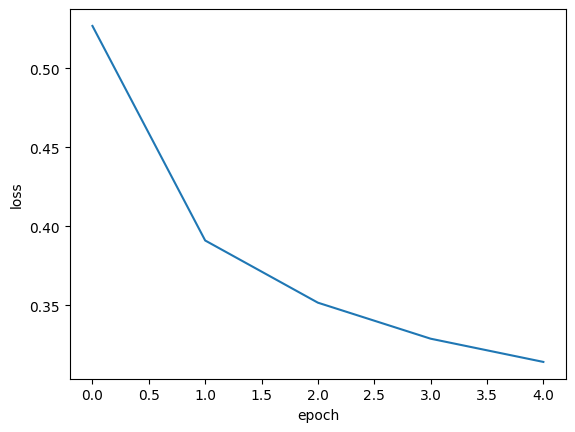

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

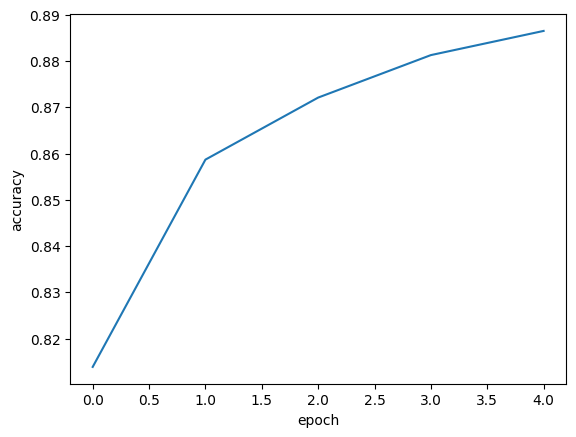

In [72]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

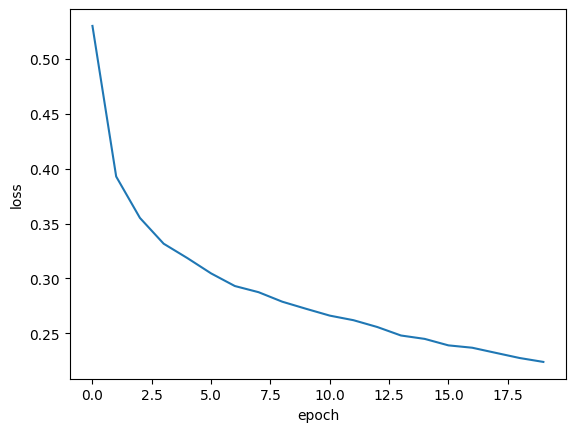

In [73]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [74]:
# 참고로 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이기에 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있음. 따라서 모델이 잘 훈련되었는지 판단하려면 손실 함수의 값을 확인하는 것이 더 낫다.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [75]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


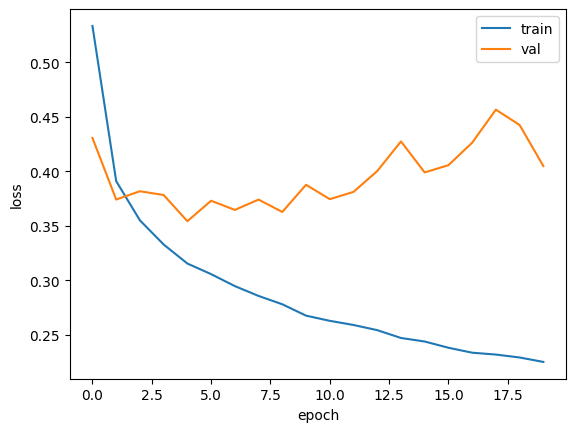

In [76]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

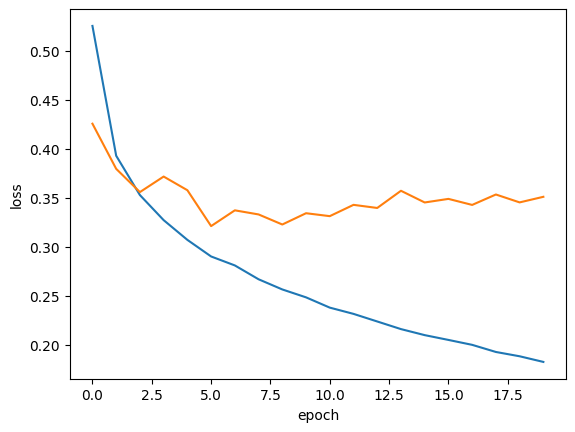

In [78]:
model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [79]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

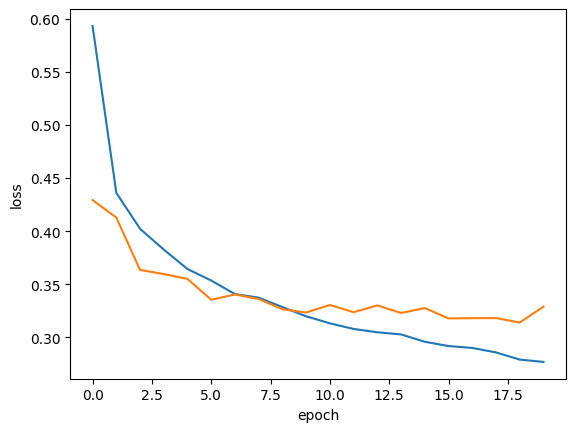

In [80]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [81]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=11, verbose=0, validation_data=(val_scaled, val_target))

In [ ]:
model.save('model-whole.keras') # 모델의 구조와 파라미터를 함께 저장하는 save() 메서드임. 이 메서드는 .keras 확장자를 가진 파일에 필요한 정보를 모두 압축해서 저장

In [84]:
model.save_weights('model.weights.h5')

In [87]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1) # 여기서 axis=-1은 배열의 마지막 차원을 따라 최댓값을 고른다. 즉 한 행에서 가장 큰 값을 가지는 열의 인덱스를 반환한다는 뜻임
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.87825


In [89]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8783 - loss: 0.3337


[0.33374929428100586, 0.878250002861023]

In [90]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])


In [91]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8886 - loss: 0.3138


[0.31375887989997864, 0.8885833621025085]

In [92]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [93]:
print(early_stopping_cb.stopped_epoch)

10


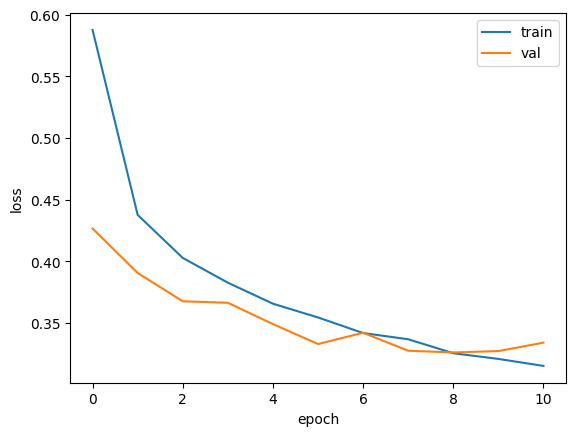

In [95]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [96]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8807 - loss: 0.3260


[0.32599252462387085, 0.8806666731834412]